In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data -O
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0   672k      0 --:--:-- --:--:-- --:--:--  687k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1660  100  1660    0     0  47428      0 --:--:-- --:--:-- --:--:-- 47428


In [2]:
!ls

auto-mpg.data  auto-mpg.ipynb  auto-mpg.names  README.md


In [3]:
!cat auto-mpg.names

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("auto-mpg.data", delim_whitespace=True, names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
df = df.drop(columns=["car name"])
df["model year"] = df["model year"].astype(float)
df["origin"] = df["origin"].astype(float)
df["cylinders"] = df["cylinders"].astype(float)

In [9]:
df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year      float64
origin          float64
dtype: object

In [10]:
df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
from sklearn.utils.multiclass import type_of_target
x = df.drop("mpg", axis = 1) #Removed to not mess with feature selection and for test/train split later
y = df["mpg"]

In [12]:
#Imputing the missing values in horsepower using the avearage/mean
def meanOrMode(x):
    if x.dtype == "object":
        return x.mode()
    return x.mean()

x_imputeMean = df
x_imputeMean["horsepower"] = x_imputeMean["horsepower"].replace("?", meanOrMode(x_imputeMean["horsepower"])[0])
x_imputeMean["horsepower"] = x_imputeMean["horsepower"].astype(float)
x_imputeMean["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [13]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [14]:
#Binning to remove noisy data and squash outliers, done on all attributes
def binning(x):
    split = [[v] for v in x_imputeMean[x]]
    est.fit(split)
    transformed = est.transform(split)
    x_imputeMean[x] = transformed

est = KBinsDiscretizer(n_bins = 5, encode = "ordinal", strategy = "quantile") #Splits data into 5 equal bins then computes their average
names = list(x_imputeMean)
for string in names:
    binning(string)

x_imputeMeanBin = x_imputeMean.copy()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


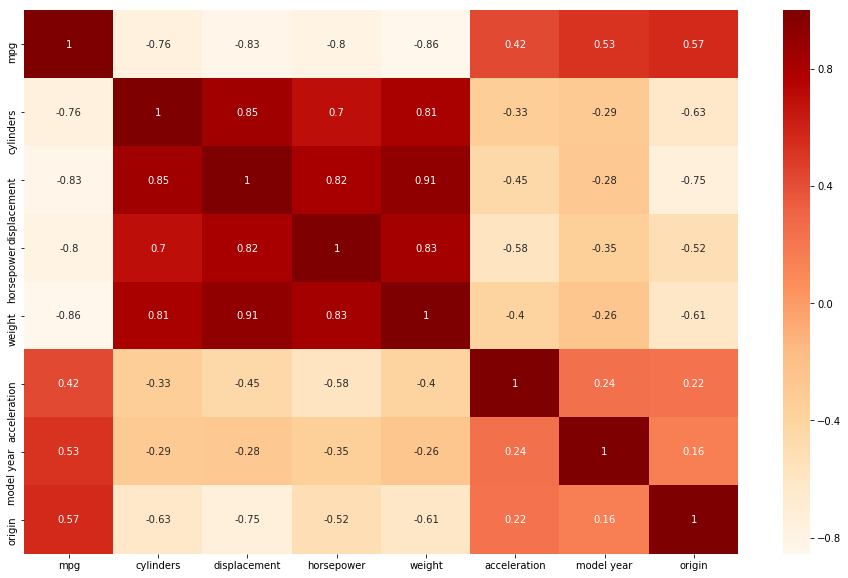

In [15]:
#Used to check if feature selection is removing the insignificant and correlated data
ax, fig = plt.subplots(figsize = (16, 10))
correlation_matrix = x_imputeMean.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "OrRd")
plt.show()

Optimal number of features:  2


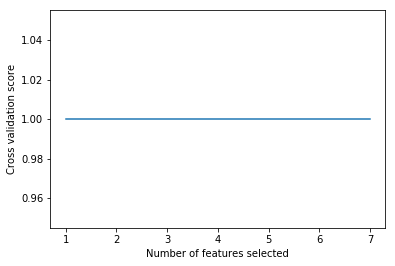

Optimal number of features:  2


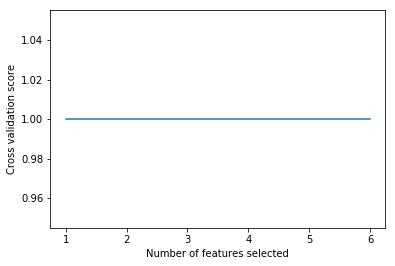

Optimal number of features:  2


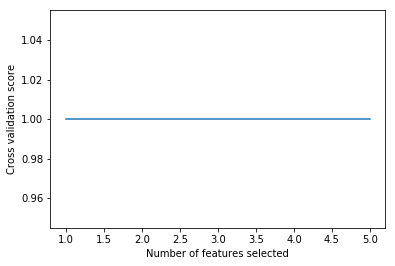

Optimal number of features:  2


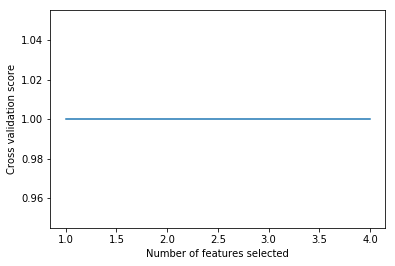

Optimal number of features:  2


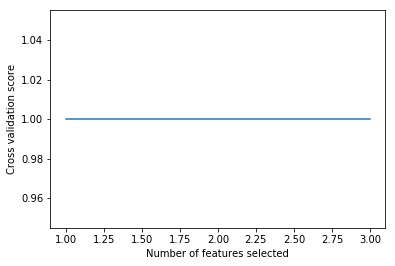

Optimal number of features:  2


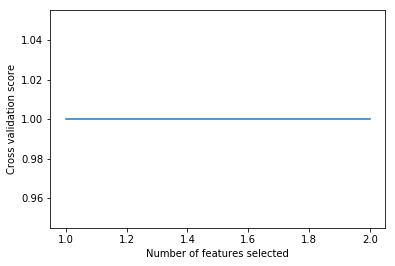

Optimal number of features:  2


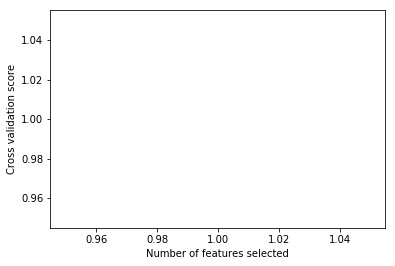

Features removed =  7


In [16]:
#Feature selection using kbest to find attributes of the cars that are statistically significant when calculating their mpg
def feature_sel(x):
    enc = LabelEncoder()
    mpg = enc.fit_transform(y)
    clf = DecisionTreeClassifier()
    #Using 10-fold cross validation decision tree
    rfecv = RFECV(estimator = clf, step = 1, cv = StratifiedKFold(10), scoring = "accuracy", min_features_to_select = 2)
    rfecv.fit(x, mpg)
    
    greatest = 1
    count = 0
    remove = ""
    features = list(x.columns)
    print("Optimal number of features: ", rfecv.n_features_) #We can see if each iteration causes the number of optimal features to change and if this corresponds to the number removed
    
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    for i in range(0, len(features)):
        if rfecv.ranking_[i] > 1:
            count += 1
        if rfecv.ranking_[i] > greatest:
            greatest == rfecv.ranking_[i]
            remove = ""
            remove += features[i]
    if remove != "":
        finish = x.drop(remove, axis = 1)
        remove = ""
        return finish, count
    else:
        return x, 0
    
x_imputeMeanBinFeature, check = feature_sel(x_imputeMeanBin)
count = 1
while check > 0: #This removes the least significant attribute then runs the feature selection again to see if there is still a reason to remove a data point (still insignificant)
    x_imputeMeanBinFeature, check = feature_sel(x_imputeMeanBinFeature) 
    count+= 1
    
print("Features removed = ", count) #If final optimal features = 6 then we expect 10 - 6 to be removed EXAMPLE

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Train on 70% of the data and test on 30%
train_x, test_x, train_y, test_y = train_test_split(x_imputeMeanBinFeature, y, test_size = 0.3)

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
#Using a Linear model with Stochastic Gradient Descent to minimise chance that model gets stuck in local minima 
model = SGDRegressor()

model.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

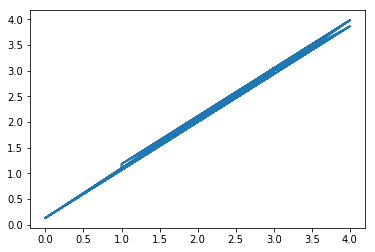

In [21]:
model.coef_

predicted = model.predict(test_x)
plt.plot(test_y, predicted) #Visualisation of model prediction accuracy

In [22]:
model.score(test_x, test_y)

0.9959822026464998